In [222]:
from xgboost.sklearn import XGBRegressor
from xgboost import plot_importance
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [223]:
df=pd.read_csv('pcaAfter_data.csv',index_col=0)
df

,% Fair/Poor,% Children in Poverty,% Frequent Physical Distress,% Frequent Mental Distress,% Free or Reduced Lunch,% Smokers,Household Income,% Diabetic,Food Environment Index,% Excessive Drinking,...,% African American,Income Ratio,% Not Proficient in English,% Obese,Chlamydia Rate,% Uninsured,% With Access,Violent Crime Rate,% Severe Housing Problems,% Food Insecure
0,18.960996,19.100000,13.228410,13.376449,46.469558,18.693852,57389.333333,12.366667,7.166667,16.342010,...,19.214392,4.744866,25.369339,35.766667,363.133333,8.907229,69.710041,270.094073,14.887821,13.400000
1,17.836378,15.633333,12.826703,13.158445,46.495522,17.163011,56885.000000,10.900000,7.966667,17.319437,...,8.927992,4.505922,28.536540,30.333333,334.266667,11.444468,71.571183,208.220132,13.855400,12.200000
2,27.197267,44.633333,16.394966,15.528751,67.764101,21.999995,33252.000000,17.866667,5.566667,12.948005,...,47.810878,5.793803,16.047084,43.233333,610.733333,12.747597,53.388923,385.759287,14.861111,22.666667
3,19.813241,27.600000,13.208858,13.339179,62.520705,19.704733,44979.333333,14.833333,7.666667,15.856681,...,21.406845,4.289527,25.562522,37.866667,314.600000,10.735418,27.083788,108.449709,11.165485,15.433333
4,21.248431,18.666667,14.174388,14.286424,53.635429,19.736224,48626.000000,15.000000,8.466667,14.743531,...,1.454219,4.210087,30.262079,34.600000,154.233333,13.120253,23.544829,392.563537,10.516004,10.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,14.937694,10.666667,10.703205,11.000000,35.777860,18.024474,74483.666667,8.266667,7.766667,20.957303,...,1.115051,4.091974,27.804303,30.266667,220.066667,13.154998,82.895448,316.831382,9.952626,10.900000
3138,11.971453,6.900000,9.807909,10.107394,23.735664,14.182123,91116.666667,3.733333,8.233333,21.844526,...,0.577518,3.891758,29.701423,13.133333,379.333333,15.344839,99.906077,234.963117,16.989310,9.900000
3139,15.845821,11.700000,11.072975,11.967527,37.261519,17.737558,65172.666667,10.100000,7.433333,17.037786,...,0.694921,4.550020,29.899465,33.266667,250.166667,12.888246,82.672791,60.668839,11.813369,13.266667
3140,15.985324,15.033333,11.003539,11.239506,40.502884,16.286467,54237.333333,11.566667,8.300000,16.174420,...,0.489748,3.575821,28.269307,28.600000,214.466667,16.910093,83.727646,78.422035,10.671435,11.400000


In [224]:
X = df.iloc[:,0:23]
y = df.iloc[:,23:24]

In [225]:
y

,% Food Insecure
0,13.400000
1,12.200000
2,22.666667
3,15.433333
4,10.900000
...,...
3137,10.900000
3138,9.900000
3139,13.266667
3140,11.400000


In [226]:
X

,% Fair/Poor,% Children in Poverty,% Frequent Physical Distress,% Frequent Mental Distress,% Free or Reduced Lunch,% Smokers,Household Income,% Diabetic,Food Environment Index,% Excessive Drinking,...,% Unemployed,% African American,Income Ratio,% Not Proficient in English,% Obese,Chlamydia Rate,% Uninsured,% With Access,Violent Crime Rate,% Severe Housing Problems
0,18.960996,19.100000,13.228410,13.376449,46.469558,18.693852,57389.333333,12.366667,7.166667,16.342010,...,4.276360,19.214392,4.744866,25.369339,35.766667,363.133333,8.907229,69.710041,270.094073,14.887821
1,17.836378,15.633333,12.826703,13.158445,46.495522,17.163011,56885.000000,10.900000,7.966667,17.319437,...,4.338461,8.927992,4.505922,28.536540,30.333333,334.266667,11.444468,71.571183,208.220132,13.855400
2,27.197267,44.633333,16.394966,15.528751,67.764101,21.999995,33252.000000,17.866667,5.566667,12.948005,...,6.557128,47.810878,5.793803,16.047084,43.233333,610.733333,12.747597,53.388923,385.759287,14.861111
3,19.813241,27.600000,13.208858,13.339179,62.520705,19.704733,44979.333333,14.833333,7.666667,15.856681,...,4.990609,21.406845,4.289527,25.562522,37.866667,314.600000,10.735418,27.083788,108.449709,11.165485
4,21.248431,18.666667,14.174388,14.286424,53.635429,19.736224,48626.000000,15.000000,8.466667,14.743531,...,4.337052,1.454219,4.210087,30.262079,34.600000,154.233333,13.120253,23.544829,392.563537,10.516004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,14.937694,10.666667,10.703205,11.000000,35.777860,18.024474,74483.666667,8.266667,7.766667,20.957303,...,4.945469,1.115051,4.091974,27.804303,30.266667,220.066667,13.154998,82.895448,316.831382,9.952626
3138,11.971453,6.900000,9.807909,10.107394,23.735664,14.182123,91116.666667,3.733333,8.233333,21.844526,...,3.141591,0.577518,3.891758,29.701423,13.133333,379.333333,15.344839,99.906077,234.963117,16.989310
3139,15.845821,11.700000,11.072975,11.967527,37.261519,17.737558,65172.666667,10.100000,7.433333,17.037786,...,4.888937,0.694921,4.550020,29.899465,33.266667,250.166667,12.888246,82.672791,60.668839,11.813369
3140,15.985324,15.033333,11.003539,11.239506,40.502884,16.286467,54237.333333,11.566667,8.300000,16.174420,...,4.346180,0.489748,3.575821,28.269307,28.600000,214.466667,16.910093,83.727646,78.422035,10.671435


X = (X-X.min())/(X.max()-X.min())
X

y = (y-y.min())/(y.max()-y.min())
y

In [227]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

In [228]:
xgb_model = XGBRegressor(n_estimators=160, 
                     learning_rate=0.1, 
                     max_depth=5, 
                     silent=True, 
                     objective='reg:gamma')
xgb_model.fit(X_train, y_train) 

ans = xgb_model.predict(X_test)

[19:14:27] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1667849653518/work/src/learner.cc:767: 
Parameters: { "silent" } are not used.



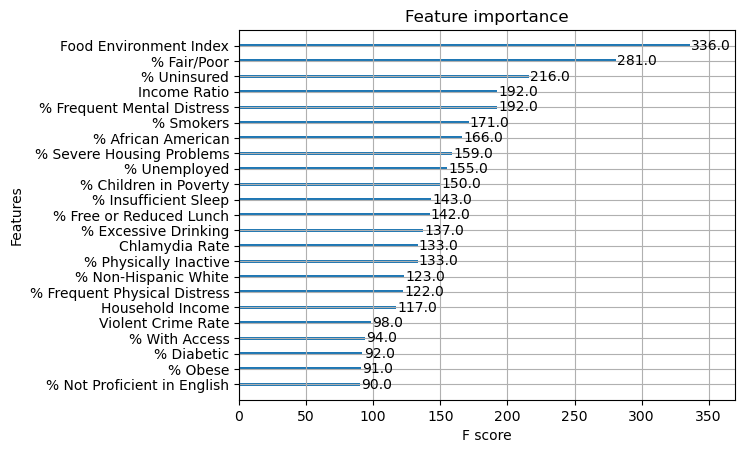

In [230]:
plot_importance(xgb_model)
plt.show()

In [232]:
df20=pd.read_csv('df20.csv',index_col=0)
df20
X20 = df.iloc[:,0:23]
y20 = df.iloc[:,23:24]

[21:12:15] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1667849653518/work/src/learner.cc:767: 
Parameters: { "silent" } are not used.



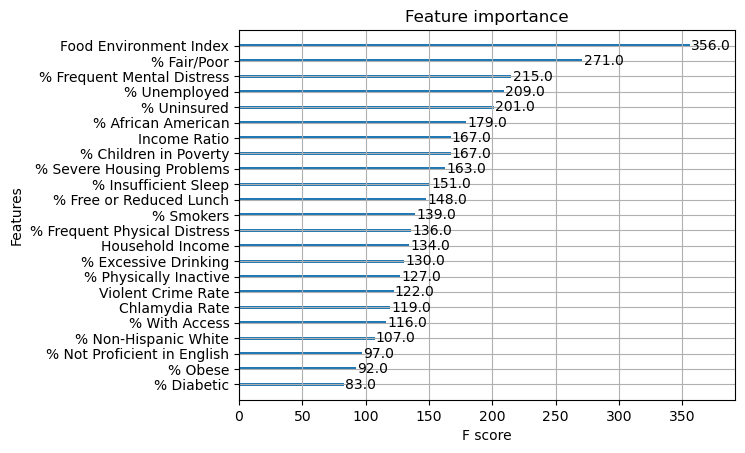

In [239]:
xgb_model = XGBRegressor(n_estimators=160, 
                     learning_rate=0.1, 
                     max_depth=5, 
                     silent=True, 
                     objective='reg:gamma')
xgb_model.fit(X20, y20)
plot_importance(xgb_model)
plt.show()

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


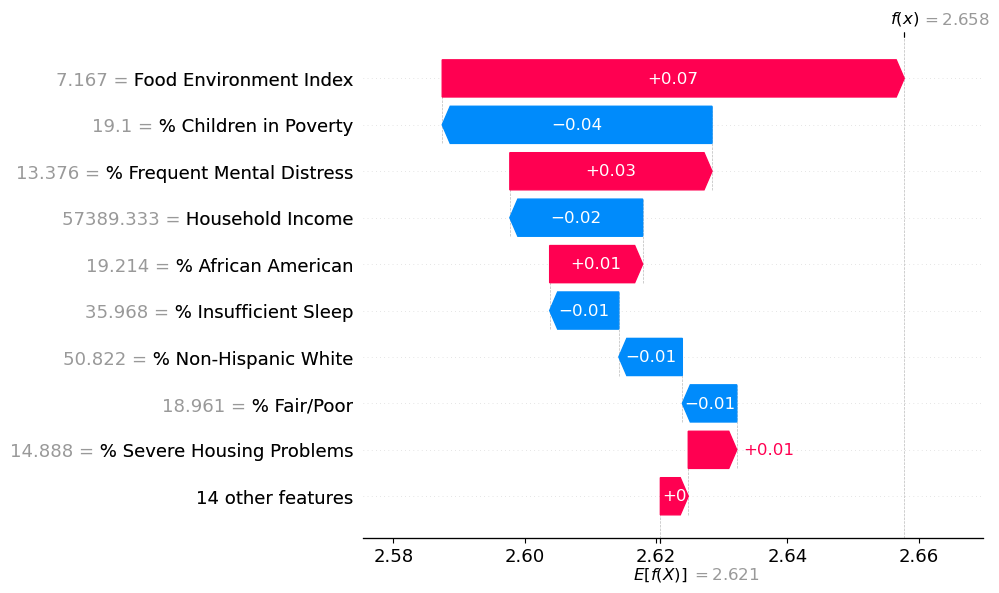

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


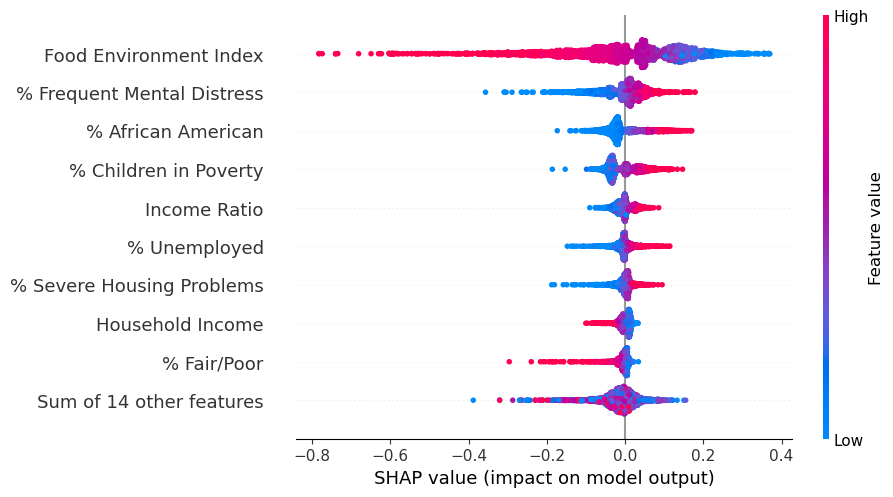

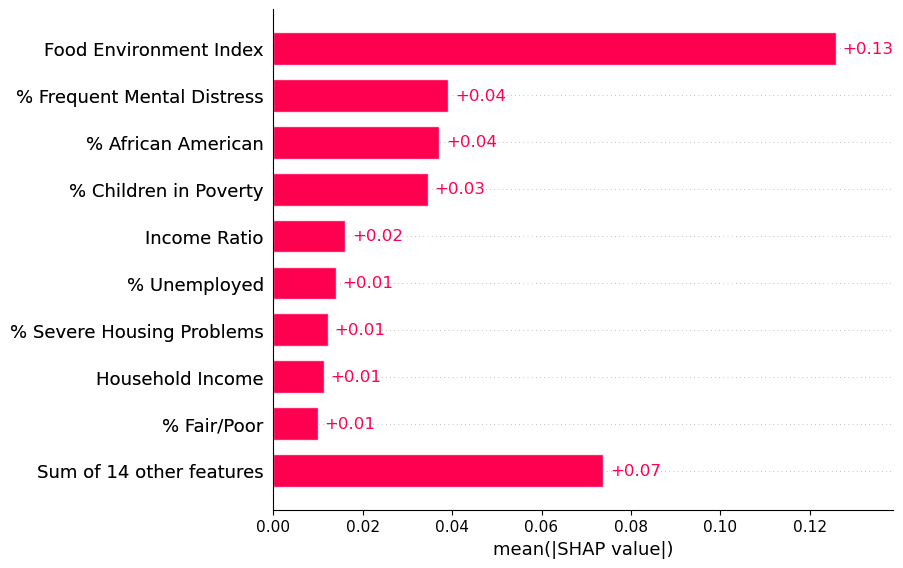

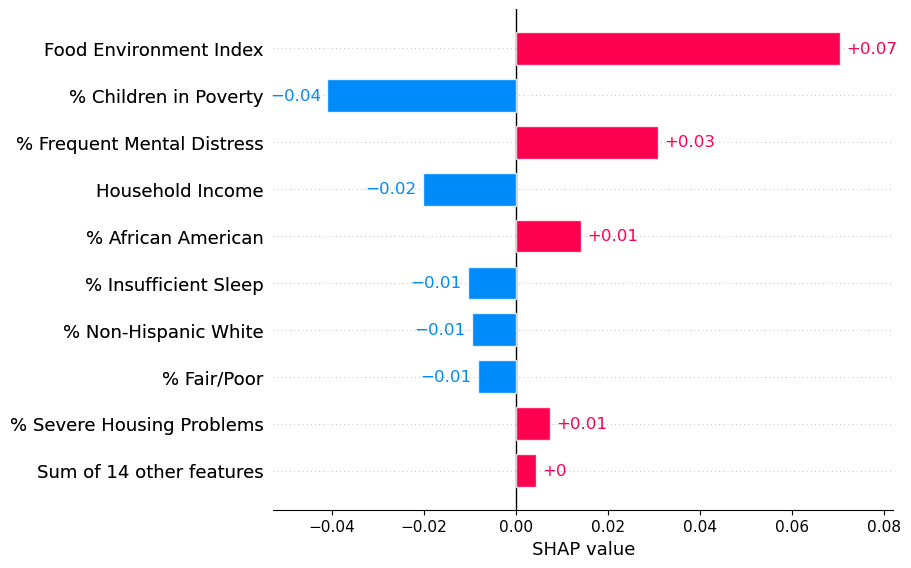

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


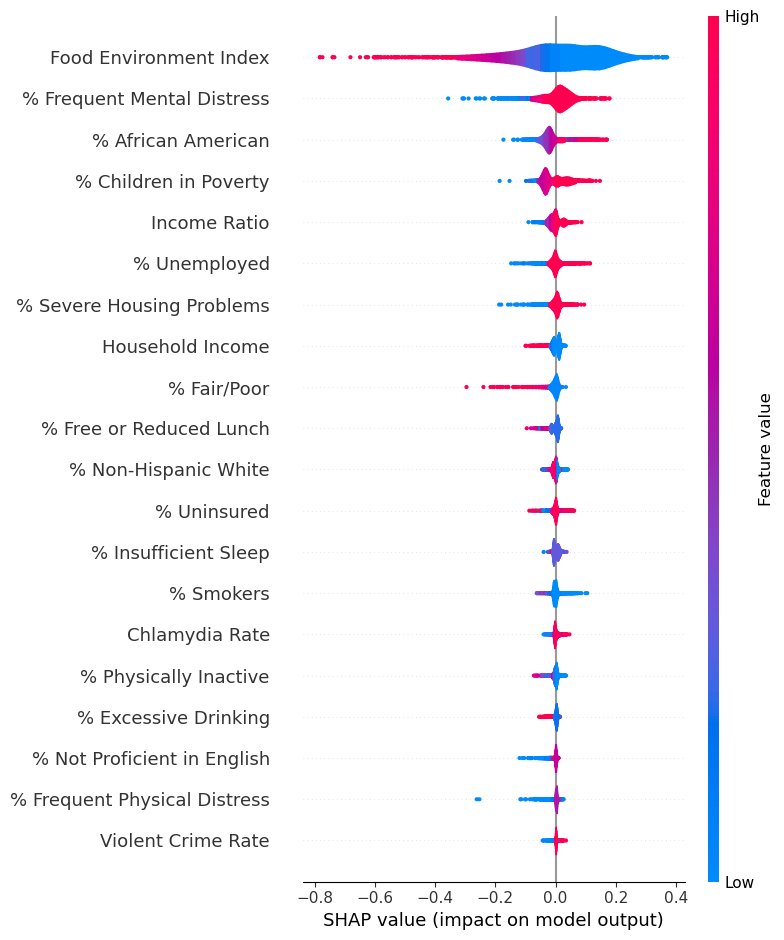

In [240]:
import shap
from sklearn.inspection import permutation_importance
explainer = shap.Explainer(xgb_model)
shap_values = explainer(X20)
shap.plots.waterfall(shap_values[0])
shap.plots.beeswarm(shap_values)
shap.plots.bar(shap_values)
shap.plots.bar(shap_values[0])
shap.summary_plot(shap_values, plot_type='violin')

In [235]:
y20pre = xgb_model.predict(X20)
y20pre
df20pre = pd.DataFrame(y20pre)
df20pre

,0
0,14.692493
1,12.661796
2,23.189501
3,15.012065
4,11.170109
...,...
3137,11.329272
3138,10.110580
3139,13.149467
3140,10.369824


In [238]:
from sklearn.metrics import mean_squared_error

rms = mean_squared_error(y20, df20pre, squared=False)
rms

0.8203498347175164

In [200]:
import shap
from sklearn.inspection import permutation_importance

In [201]:
explainer = shap.Explainer(xgb_model)
pd.DataFrame(zip(xgb_model.get_booster().feature_names,xgb_model.feature_importances_),columns = ['Feature name','xgb score'])

,Feature name,xgb score
0,% Fair/Poor,0.012758
1,% Children in Poverty,0.190895
2,% Frequent Physical Distress,0.018881
3,% Frequent Mental Distress,0.051116
4,% Free or Reduced Lunch,0.012952
5,% Smokers,0.012970
6,Household Income,0.015160
7,% Diabetic,0.007452
8,Food Environment Index,0.407850
9,% Excessive Drinking,0.008750


In [202]:
shap_values = explainer(X_train)
shapvalue = pd.DataFrame(zip(shap_values.feature_names,np.abs(shap_values.values).mean(0)),columns = ['Feature name','shape score'])
shapvalue.to_csv('shape values.csv')

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [203]:
shap_values[0]
shapdf=df['feature name','shape values']=pd.Series(shap_values[0].values, shap_values.feature_names)
shapdf.to_csv('shape values.csv')

In [204]:
shap_values2 = pd.DataFrame(shap_values.values,columns = shap_values.feature_names)
shap_values2

,% Fair/Poor,% Children in Poverty,% Frequent Physical Distress,% Frequent Mental Distress,% Free or Reduced Lunch,% Smokers,Household Income,% Diabetic,Food Environment Index,% Excessive Drinking,...,% Unemployed,% African American,Income Ratio,% Not Proficient in English,% Obese,Chlamydia Rate,% Uninsured,% With Access,Violent Crime Rate,% Severe Housing Problems
0,0.002840,-0.035979,-0.011923,-0.057361,0.004474,-0.009857,-0.010722,0.000058,0.032468,0.007298,...,0.004706,-0.035437,-0.009408,0.005275,0.004649,-0.004571,-0.007523,0.000874,-0.001014,-0.025089
1,-0.004052,-0.031586,-0.000294,-0.003291,0.001965,-0.012773,-0.012604,-0.002110,-0.221910,-0.004679,...,-0.018599,-0.025254,-0.011303,0.005323,-0.003140,-0.000291,-0.003575,-0.000775,-0.000148,0.003560
2,-0.000201,-0.034459,-0.003926,0.005386,-0.001245,-0.014223,-0.023065,-0.001100,0.032278,0.002002,...,-0.006043,0.010038,0.002282,-0.001074,-0.002837,0.004278,-0.001331,-0.004349,-0.001054,-0.000930
3,-0.005480,0.053244,-0.000119,0.015051,-0.022746,-0.005735,0.007295,0.000977,0.070807,0.011987,...,0.008663,0.055100,0.036323,0.000810,-0.001278,0.011374,0.001409,0.001638,-0.000922,0.005648
4,0.001730,-0.037874,-0.005991,-0.041311,0.007625,-0.013588,-0.000306,-0.000648,-0.048593,0.003825,...,-0.012383,-0.021614,-0.018876,0.005619,0.005712,-0.000153,0.002014,0.002582,-0.005149,-0.022372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2194,-0.001668,-0.038317,-0.021436,-0.079522,0.002025,-0.012658,0.004337,-0.000866,0.103095,-0.010975,...,-0.045302,-0.089079,-0.022686,0.002672,-0.004072,-0.008145,-0.002909,-0.002517,0.003235,-0.034088
2195,-0.045098,0.006787,-0.000942,0.015386,-0.024175,-0.019897,-0.000354,0.000836,-0.014986,-0.001246,...,-0.002038,-0.016485,-0.008282,-0.018572,-0.001816,0.019437,0.013157,-0.001666,0.000306,0.006018
2196,-0.004369,0.033279,0.000539,0.010576,-0.017324,0.000007,0.003480,-0.001527,0.166886,-0.002116,...,0.006028,0.018396,0.039301,-0.000782,0.002803,0.000120,0.003343,0.000741,-0.000968,0.002027
2197,-0.001520,-0.034932,-0.004669,-0.012915,0.005502,0.004817,-0.009315,-0.005697,-0.259479,-0.008417,...,0.004572,-0.017805,-0.011953,0.001076,-0.002753,-0.002237,-0.020425,0.003636,0.000659,0.027799


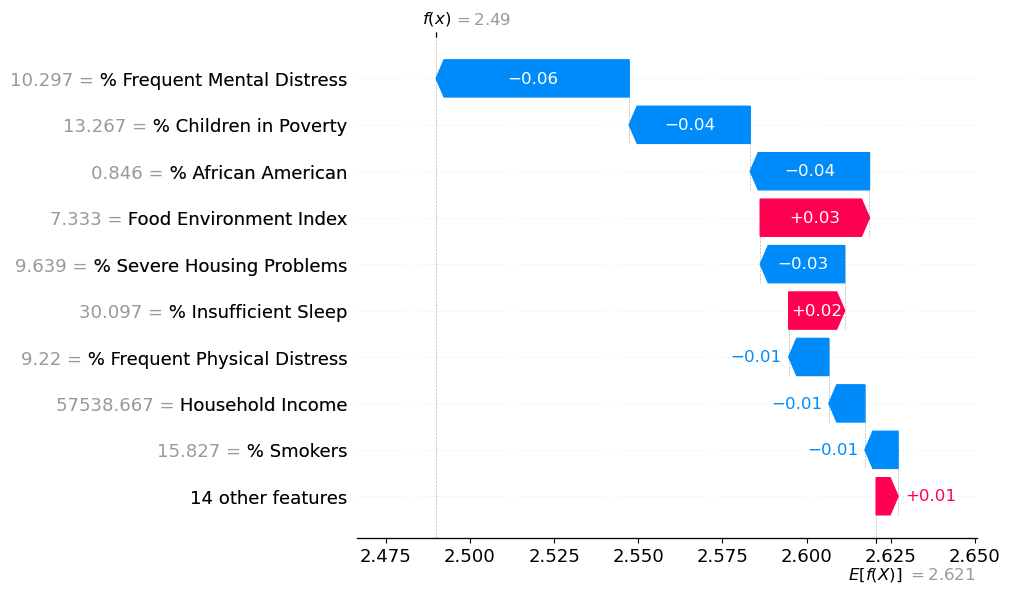

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


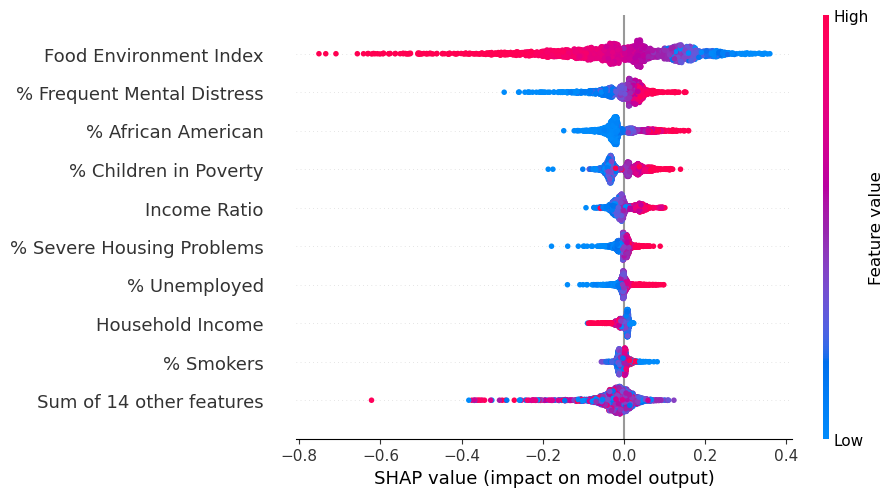

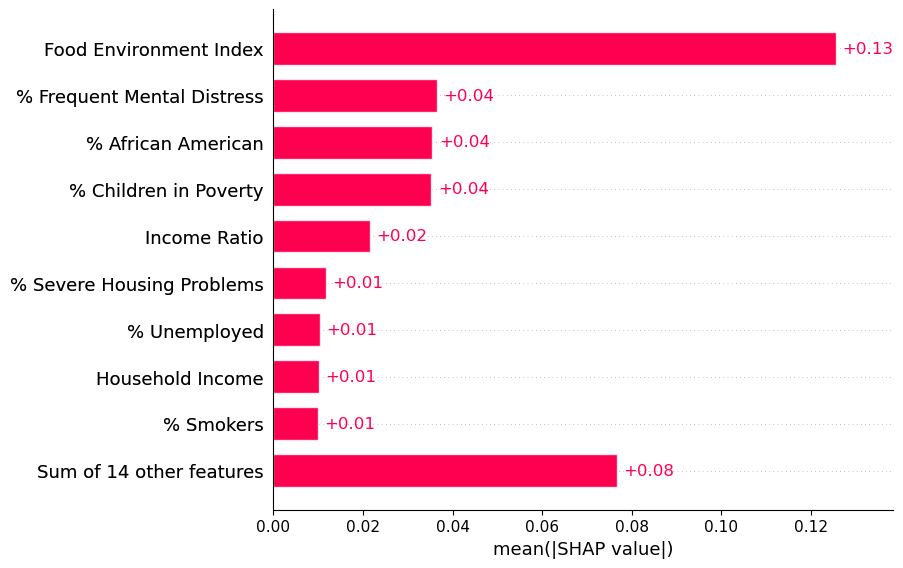

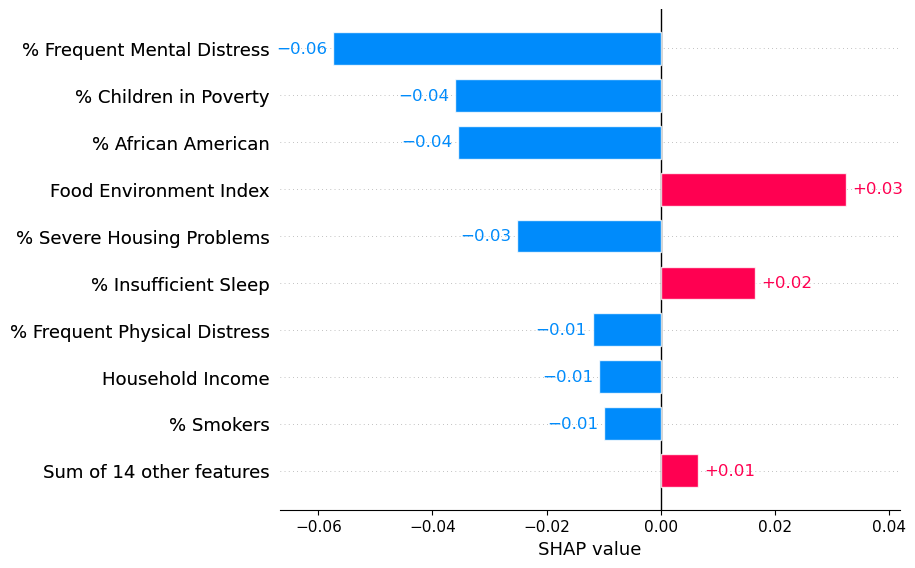

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


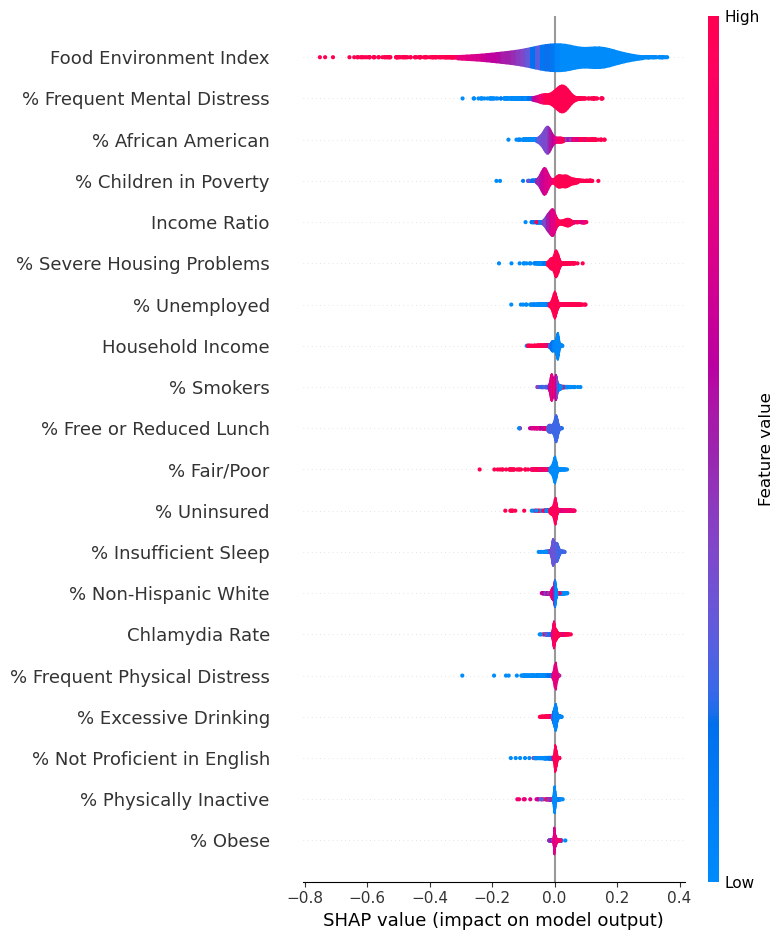

In [205]:
shap.plots.waterfall(shap_values[0])
shap.plots.beeswarm(shap_values)
shap.plots.bar(shap_values)
shap.plots.bar(shap_values[0])
shap.summary_plot(shap_values, plot_type='violin')